<a href="https://colab.research.google.com/github/nimishakadam/Breast-Cancer-Prediction-using-Wisconsin-dataset/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [17]:
data=pd.read_csv("/content/drive/MyDrive/breast cancer dataset.csv")
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [18]:
data.shape

(569, 33)

In [19]:
data.drop('Unnamed: 32',axis = 1,inplace = True)

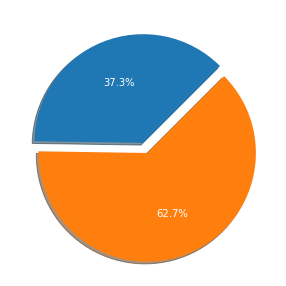

In [20]:
fig=plt.figure(figsize=(5,5))
malignant=data[data['diagnosis'] == 'M']
benign=data[data['diagnosis'] == 'B']
ck=[malignant['diagnosis'].count(),benign['diagnosis'].count()]
legpie=plt.pie(ck,labels=["malignant","benign"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 startangle = 45,
                 explode=(0, 0.1), textprops={'color':"w"})

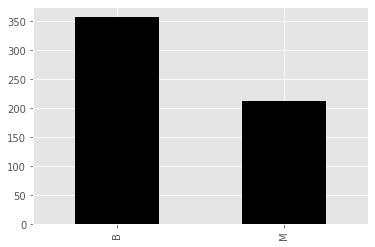

In [42]:
y=data['diagnosis']
y.value_counts().plot(kind ="bar", color = 'black')

In [38]:
B,M = y.value_counts()
print('Number of benign tumors:', B)
print('Number of malignant tumors:', M)

Number of benign tumors: 357
Number of malignant tumors: 212


In [23]:
new_data_B= data[data.diagnosis !='M']
new_data_M= data[data.diagnosis !='B']

Text(0, 0.5, 'mean concavity for benign')

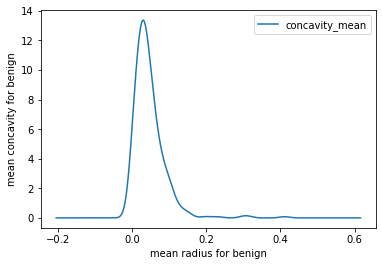

In [26]:
new_data_B.plot(kind = "density",x= 'radius_mean', y = 'concavity_mean')
plt.xlabel("mean radius for benign")
plt.ylabel("mean concavity for benign")

Text(0, 0.5, 'mean concavity for malignant')

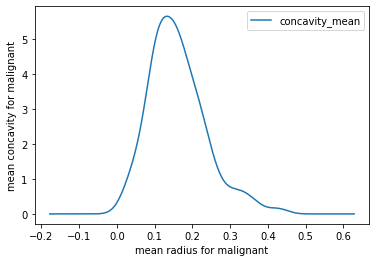

In [30]:
new_data_M.plot(kind = "density",x= 'radius_mean', y = 'concavity_mean')
plt.xlabel("mean radius for malignant")
plt.ylabel("mean concavity for malignant")

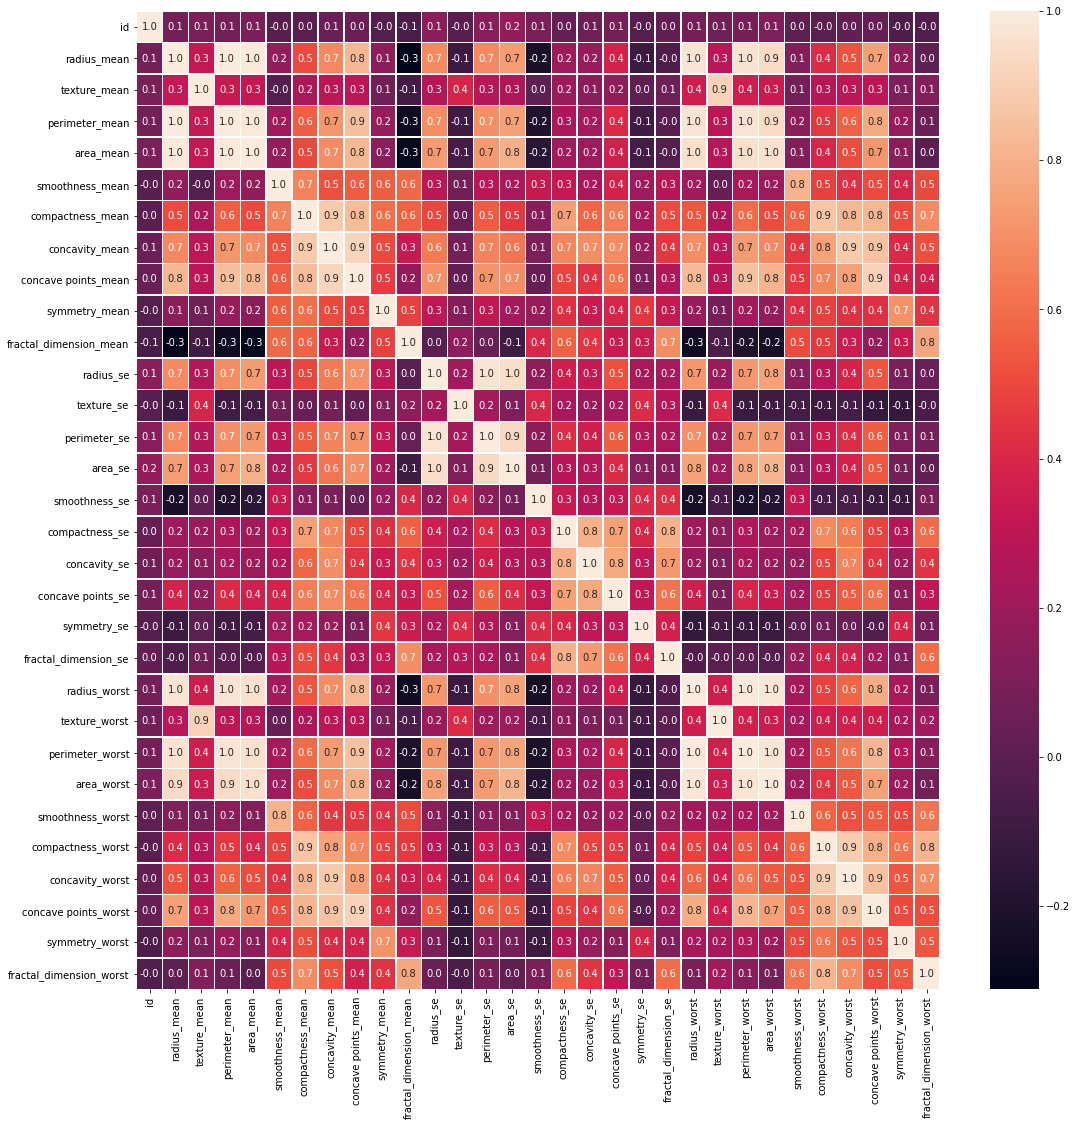

In [32]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

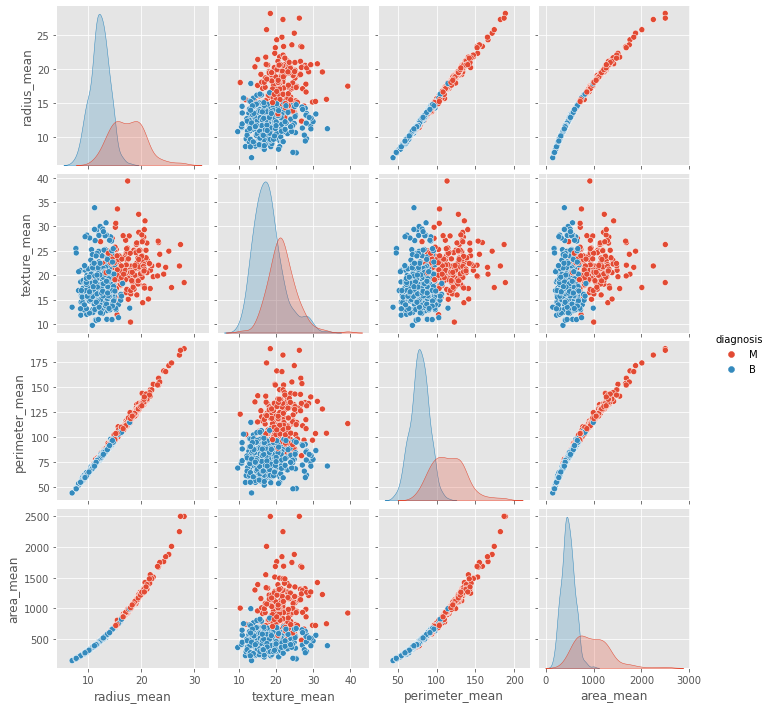

In [36]:
mpl.style.use(['ggplot']) 
sns.pairplot(data.loc[:,'diagnosis':'area_mean'], hue="diagnosis");

In [43]:
data.drop('id',axis = 1,inplace = True)
data.drop('diagnosis',axis = 1,inplace = True)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,y,test_size = 0.2,random_state = 1, shuffle=True)

In [48]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
val_pred = svclassifier.predict(X_test)
print("Accuracy for SVM classifier is: ",accuracy_score(Y_test, val_pred))
print("Confusion matrix for SVM clasifier is: \n",confusion_matrix(Y_test,val_pred))

Accuracy for SVM classifier is:  0.956140350877193
Confusion matrix for SVM clasifier is: 
 [[72  0]
 [ 5 37]]


In [70]:
 from sklearn.ensemble import RandomForestClassifier
 rfclassifier = RandomForestClassifier(max_depth=2, random_state=0)
 rfclassifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
val_pred = rfclassifier.predict(X_test)
print("Accuracy for Random Forest classifier is: ",accuracy_score(Y_test, val_pred))
print("Confusion matrix for Random Forest clasifier is: \n",confusion_matrix(Y_test,val_pred))

Accuracy for Random Forest classifier is:  0.9473684210526315
Confusion matrix for Random Forest clasifier is: 
 [[71  1]
 [ 5 37]]


In [73]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
val_pred = mnb.predict(X_test)
print("Accuracy for Multinomial Naive Bayes is: ",accuracy_score(Y_test, val_pred))
print("Confusion matrix for Multinomial Naive Bayes is: \n",confusion_matrix(Y_test,val_pred))

Accuracy for Multinomial Naive Bayes is:  0.868421052631579
Confusion matrix for Multinomial Naive Bayes is: 
 [[70  2]
 [13 29]]


In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
val_pred = lr.predict(X_test)
print("Accuracy for Logistic Regression classifier is: ",accuracy_score(Y_test, val_pred))
print("Confusion matrix for Logistic Regression classifier is: \n",confusion_matrix(Y_test,val_pred))

Accuracy for Logistic Regression classifier is:  0.9473684210526315
Confusion matrix for Logistic Regression classifier is: 
 [[71  1]
 [ 5 37]]
